### Anirudh Sriram
### 21BAI1239

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### 1) Load the dataset

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 2) Data Preprocessing

In [3]:
df.shape

(1599, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

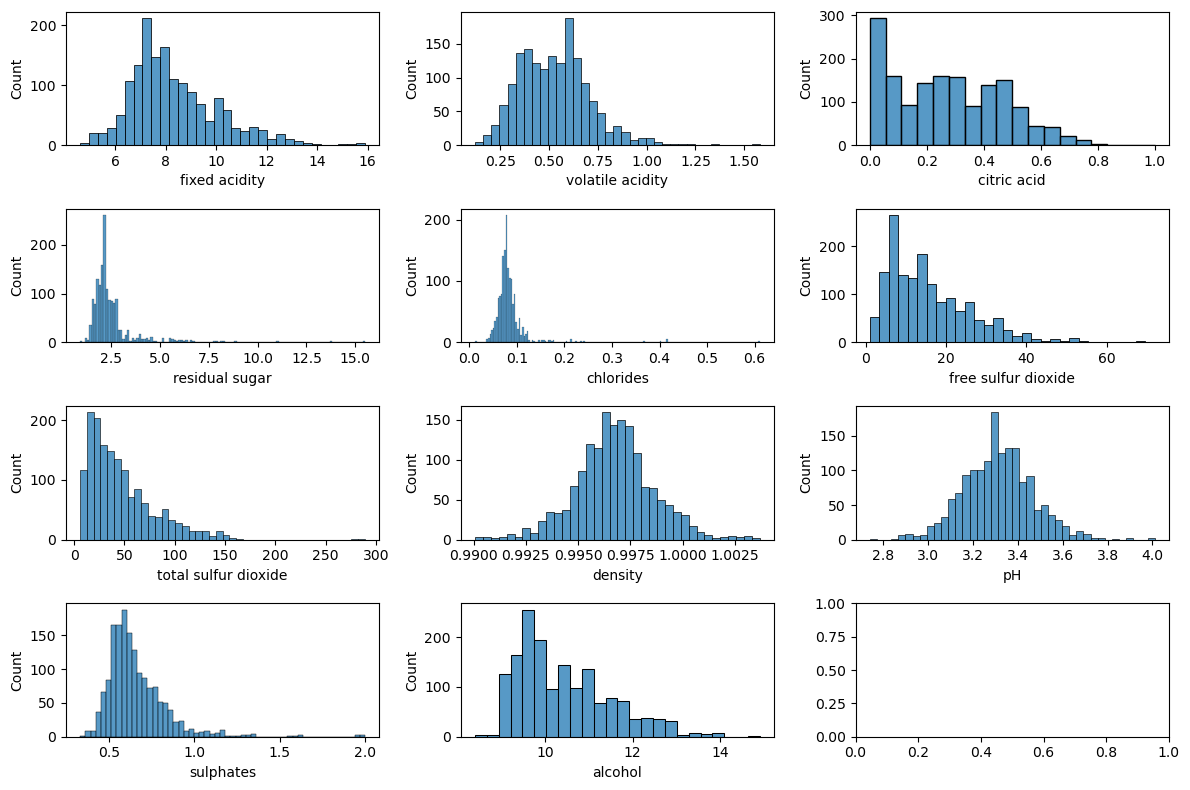

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(12, 8))
sns.histplot(df['fixed acidity'], ax=axes[0, 0])
sns.histplot(df['volatile acidity'], ax=axes[0, 1])
sns.histplot(df['citric acid'], ax=axes[0, 2])
sns.histplot(df['residual sugar'], ax=axes[1, 0])
sns.histplot(df['chlorides'], ax=axes[1, 1])
sns.histplot(df['free sulfur dioxide'], ax=axes[1, 2])
sns.histplot(df['total sulfur dioxide'], ax=axes[2, 0])
sns.histplot(df['density'], ax=axes[2, 1])
sns.histplot(df['pH'], ax=axes[2, 2])
sns.histplot(df['sulphates'], ax=axes[3, 0])
sns.histplot(df['alcohol'], ax=axes[3, 1])
plt.tight_layout()
plt.show()

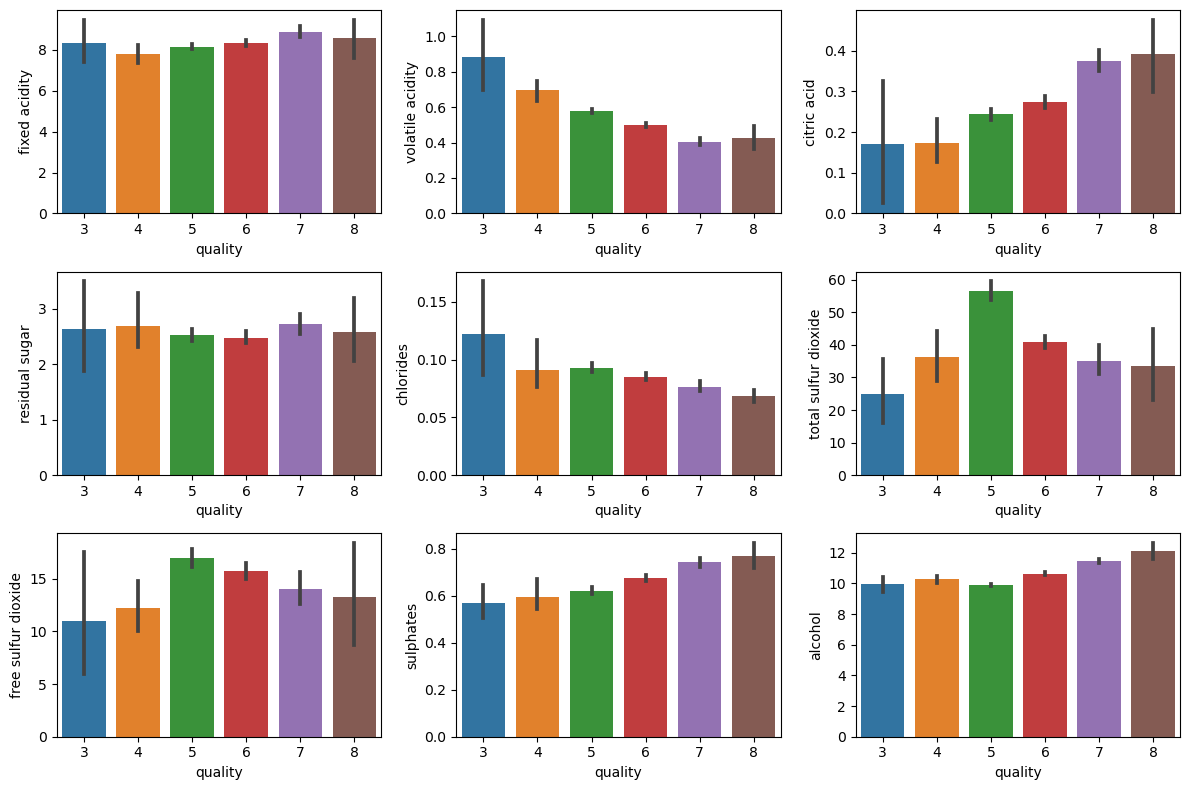

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
sns.barplot(x=df['quality'],y=df['fixed acidity'],ax=axes[0,0])
sns.barplot(x=df['quality'],y=df['volatile acidity'],ax=axes[0,1])
sns.barplot(x=df['quality'],y=df['citric acid'],ax=axes[0,2])
sns.barplot(x=df['quality'],y=df['residual sugar'],ax=axes[1,0])
sns.barplot(x=df['quality'],y=df['chlorides'],ax=axes[1,1])
sns.barplot(x=df['quality'],y=df['total sulfur dioxide'],ax=axes[1,2])
sns.barplot(x=df['quality'],y=df['free sulfur dioxide'],ax=axes[2,0])
sns.barplot(x=df['quality'],y=df['sulphates'],ax=axes[2,1])
sns.barplot(x=df['quality'],y=df['alcohol'],ax=axes[2,2])
plt.tight_layout()
plt.show()

In [12]:
df.corr().quality.sort_values()
#why is it that eventhough quality vs citric acid shows a better correlation, alcohol has a greater value for corr?

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

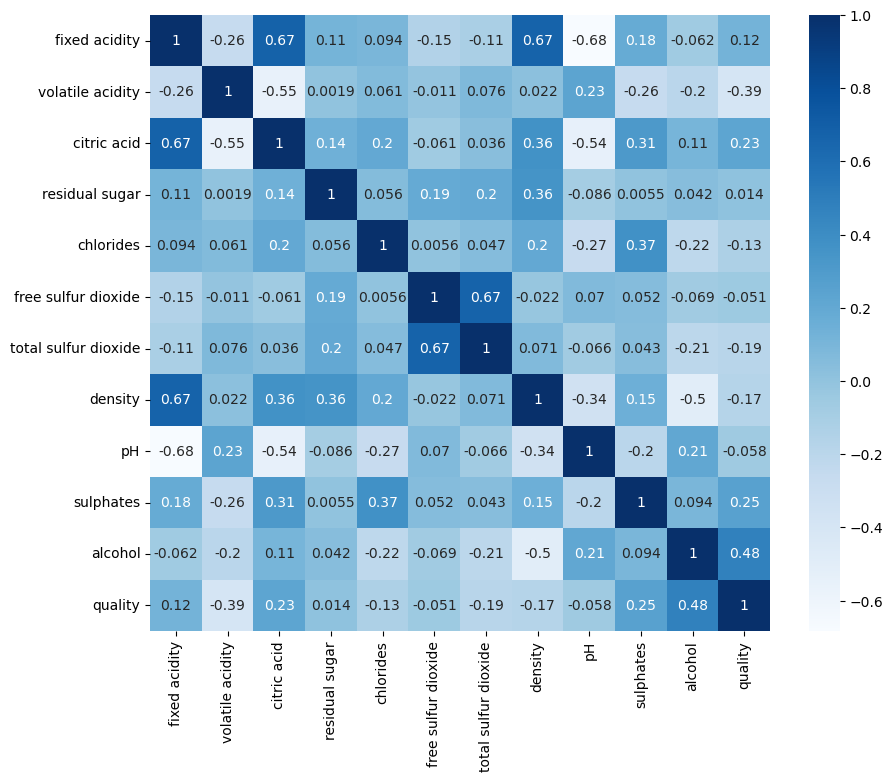

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

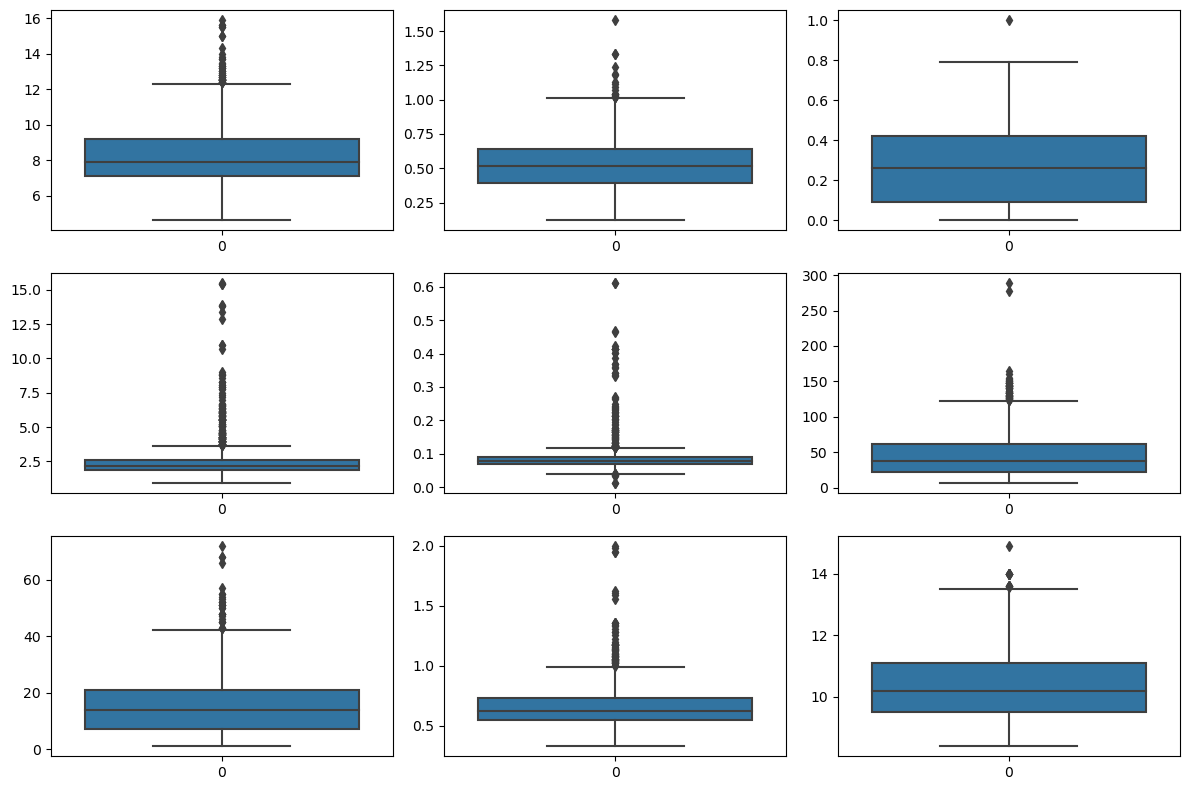

In [14]:
fig,axes=plt.subplots(3,3,figsize=(12,8))
sns.boxplot(df['fixed acidity'],ax=axes[0,0])
sns.boxplot(df['volatile acidity'],ax=axes[0,1])
sns.boxplot(df['citric acid'],ax=axes[0,2])
sns.boxplot(df['residual sugar'],ax=axes[1,0])
sns.boxplot(df['chlorides'],ax=axes[1,1])
sns.boxplot(df['total sulfur dioxide'],ax=axes[1,2])
sns.boxplot(df['free sulfur dioxide'],ax=axes[2,0])
sns.boxplot(df['sulphates'],ax=axes[2,1])
sns.boxplot(df['alcohol'],ax=axes[2,2])
plt.tight_layout()
plt.show()

In [15]:
for i in df.columns:
    if(i!='quality'):
        q1=df[i].quantile(q=0.25)
        q3=df[i].quantile(q=0.75)
        iqr=q3-q1
        ul=q3+1.5*iqr
        ll=q1-1.5*iqr
        df[i]=np.where((df[i]>ul)|(df[i]<ll),df[i].median(),df[i])

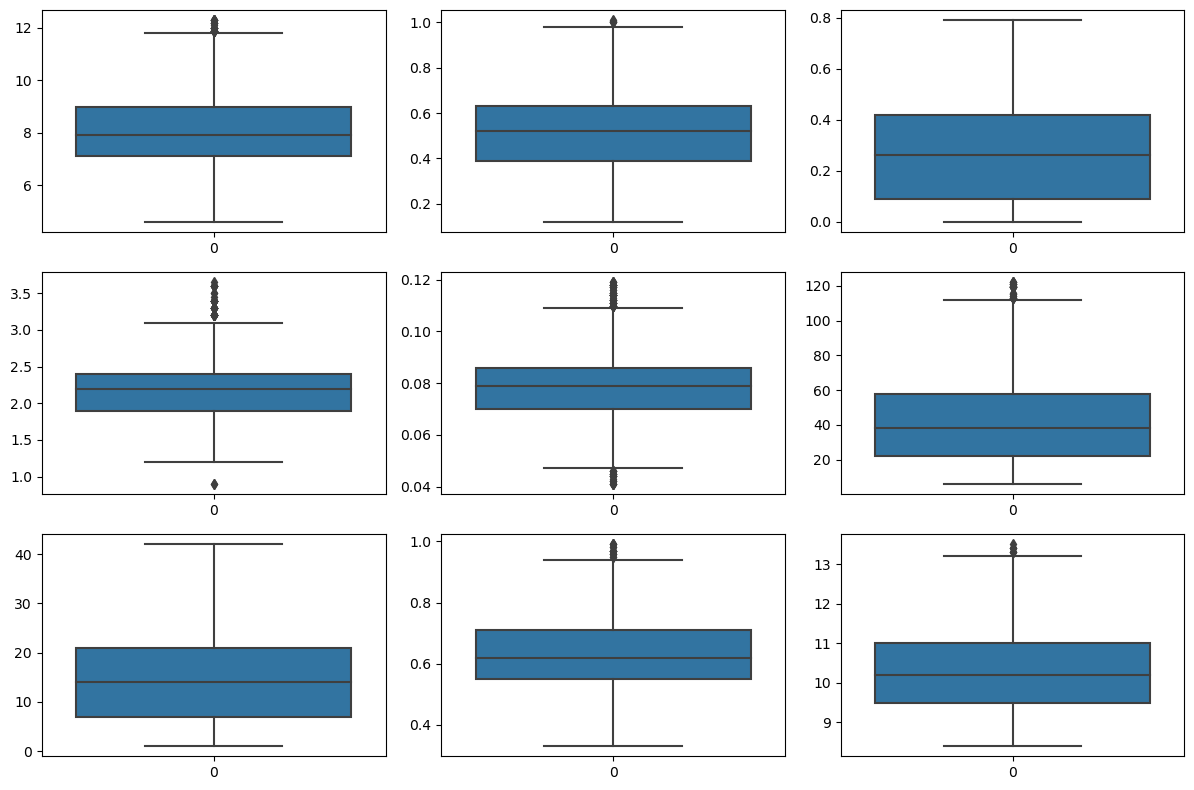

In [16]:
fig,axes=plt.subplots(3,3,figsize=(12,8))
sns.boxplot(df['fixed acidity'],ax=axes[0,0])
sns.boxplot(df['volatile acidity'],ax=axes[0,1])
sns.boxplot(df['citric acid'],ax=axes[0,2])
sns.boxplot(df['residual sugar'],ax=axes[1,0])
sns.boxplot(df['chlorides'],ax=axes[1,1])
sns.boxplot(df['total sulfur dioxide'],ax=axes[1,2])
sns.boxplot(df['free sulfur dioxide'],ax=axes[2,0])
sns.boxplot(df['sulphates'],ax=axes[2,1])
sns.boxplot(df['alcohol'],ax=axes[2,2])
plt.tight_layout()
plt.show()

In [17]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [18]:
df['quality'].replace([3,4,5,6,7,8],['Poor','Average','Fair','Good','Very Good','Exceptional'],inplace=True)

In [19]:
df['quality'].value_counts()

Fair           681
Good           638
Very Good      199
Average         53
Exceptional     18
Poor            10
Name: quality, dtype: int64

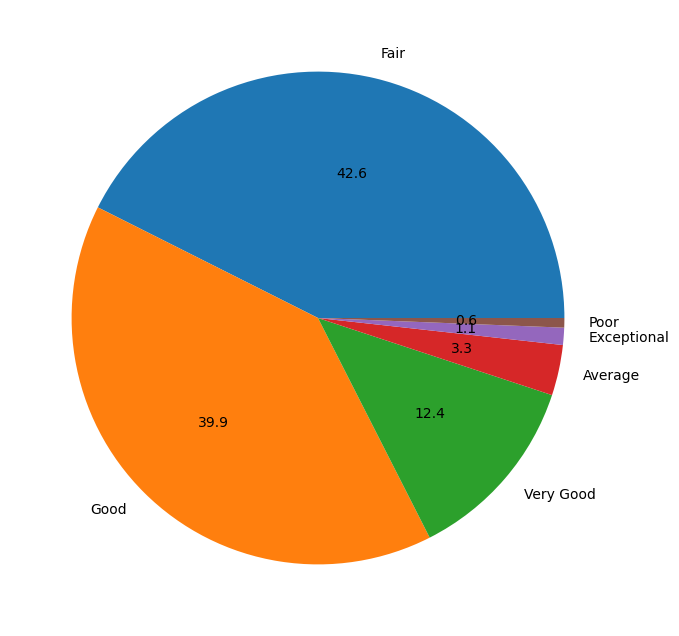

In [20]:
plt.figure(figsize=(8,8))
plt.pie(df['quality'].value_counts(),labels=['Fair','Good','Very Good','Average','Exceptional','Poor'],autopct='%1.1f')
plt.show()

#### 3) Machine Learning Model Building

In [21]:
X=df.drop('quality',axis=1)
y=df['quality']

In [22]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [23]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.363636,0.651685,0.000000,0.363636,0.448718,0.243902,0.241379,0.630058,0.773333,0.348485,0.196078
1,0.415584,0.853933,0.000000,0.618182,0.730769,0.585366,0.525862,0.514451,0.360000,0.530303,0.274510
2,0.415584,0.719101,0.050633,0.509091,0.653846,0.341463,0.413793,0.537572,0.440000,0.484848,0.274510
3,0.857143,0.179775,0.708861,0.363636,0.435897,0.390244,0.465517,0.653179,0.306667,0.378788,0.274510
4,0.363636,0.651685,0.000000,0.363636,0.448718,0.243902,0.241379,0.630058,0.773333,0.348485,0.196078


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=62)

In [26]:
X_train.shape

(1279, 11)

In [27]:
X_test.shape

(320, 11)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)

In [29]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
y_pred=model.predict(X_test)

In [31]:
df_model=pd.DataFrame({'actual':y_test,'predicted':y_pred})
df_model.head()

,actual,predicted
701,Good,Good
488,Very Good,Fair
1575,Good,Good
88,Fair,Fair
160,Fair,Fair


#### 4) Evaluate the model

In [32]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [33]:
accuracy_score(y_test,y_pred)

0.61875

In [34]:
confusion_matrix(y_test,y_pred)

array([[  1,   0,   4,   5,   0,   0],
       [  0,   1,   0,   0,   0,   3],
       [  6,   0, 108,  34,   0,   5],
       [  1,   0,  26,  71,   0,  18],
       [  0,   0,   2,   0,   0,   0],
       [  1,   1,   5,  11,   0,  17]], dtype=int64)

#### 5) Test with random observation

In [35]:
model.predict([[17,0.1,2.0,2.0,0.076,20,27,0.9990,3.7,0.9,15]])

array(['Good'], dtype=object)